In [1]:
import matplotlib.pyplot as plt
import pydicom
from pydicom.data import get_testdata_files
import glob
import numpy as np

Filename.........: $534890_CT_0__0000.DCM
Storage type.....: 1.2.840.10008.5.1.4.1.1.2
Study Date.......: 20140730
Image size.......: 384 x 384, 294912 bytes
Pixel spacing....: ['6.5104167e-1', '6.5104167e-1']
Slice location...: (missing)


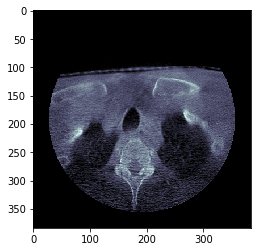

In [2]:
# 
# # Read DICOM and ploting using matplotlib
# 
# 
# This example illustrates how to open a DICOM file, print some dataset
# information, and show it using matplotlib.
# 
# 
# 

path = '/Users/dhravid/Desktop/CT_data/image1/'

filename = '$534890_CT_0__0000.DCM'

# read one dicom file
dicom_file = pydicom.dcmread( path + filename)

# show info
print("Filename.........:", filename)
print("Storage type.....:", dicom_file.SOPClassUID)

print("Study Date.......:", dicom_file.StudyDate)

if 'PixelData' in dicom_file:
    rows = int(dicom_file.Rows)
    cols = int(dicom_file.Columns)
    print("Image size.......: {rows:d} x {cols:d}, {size:d} bytes".format(
        rows=rows, cols=cols, size=len(dicom_file.PixelData)))
    if 'PixelSpacing' in dicom_file:
        print("Pixel spacing....:", dicom_file.PixelSpacing)

# use .get() if not sure the item exists, and want a default value if missing
print("Slice location...:", dicom_file.get('SliceLocation', "(missing)"))

# plot the image using matplotlib
plt.imshow(dicom_file.pixel_array, cmap=plt.cm.bone)
plt.show()




In [3]:
upper_left_pixel_list = []

filebank = []

# load all images into a list
allfiles = glob.glob(path + '*.DCM')

# find length of list
number_of_images = len(allfiles)

# finding the position of the last term of the list
array_length_of_list = number_of_images - 1

placeholder_for_loop = 0

while placeholder_for_loop < number_of_images:

    # loads one file to be opened
    image_opener = allfiles[placeholder_for_loop]
    
    # isolates file name from path
    file_name_length = len(image_opener) 
    file_name_isolator = image_opener[38:file_name_length]
    
    # sets file name
    filename = file_name_isolator

    # checks file is changing every time
    #print (filename)

    # changes dicom file being read
    dicom_file = pydicom.dcmread(path + filename)

    # creates a list with file name to append the original position
    filename_holder = [filename]

    filename_holder.append(placeholder_for_loop)

    # creates bank of all files
    filebank.append(filename_holder)

    # inputs upper-left image coordinate into loader
    upper_left_pixel_list_loader = dicom_file.ImagePositionPatient
    
    # adds label of position of file to the upper-left pixel to enable order of files in the end
    upper_left_pixel_list_loader.append(placeholder_for_loop)
    
    # loads upper-left pixel list
    upper_left_pixel_list.append(upper_left_pixel_list_loader)

    placeholder_for_loop = placeholder_for_loop + 1
    
# Sorts list
upper_left_pixel_list.sort(key=lambda w: w[2])

# isolates the proper order from the upper-left pixel list
order_of_slices = []
placeholder_for_isolation_of_proper_order_of_images = 0

# isolates the order of the slices into a separate list
while placeholder_for_isolation_of_proper_order_of_images < number_of_images:

    order_of_slices.append(upper_left_pixel_list[placeholder_for_isolation_of_proper_order_of_images][3])

    placeholder_for_isolation_of_proper_order_of_images = placeholder_for_isolation_of_proper_order_of_images + 1

image_order = []
placeholder_for_image_order_loop = 0

# put images into order
while placeholder_for_image_order_loop < number_of_images:

    # removes float from order of slices
    slice_order_loader = order_of_slices[placeholder_for_image_order_loop]
    slice_order_loader = int(slice_order_loader)

    # loads images into order
    image_order.append(filebank[slice_order_loader][0])

    placeholder_for_image_order_loop = placeholder_for_image_order_loop + 1


# find space between slices
slice_thickness = dicom_file.SliceThickness

# multiplies number of slices by space between slices to get z value
z = slice_thickness * number_of_images

# finds number of rows in a slice
rows_per_slice = dicom_file.Rows

# finds number of columns in a slice
columns_per_slice = dicom_file.Columns

# finds pixel's relationship to mm
isolate_pixel_size = dicom_file.PixelSpacing
pixel_size_in_mm = isolate_pixel_size[1]

# find x dimension
x = rows_per_slice * pixel_size_in_mm

# find y dimension
y = columns_per_slice * pixel_size_in_mm

# print out dimensions of CT in mm
print ('x is', x, 'mm') 
print ('y is', y, 'mm')
print ('z is', z, 'mm')

# print out CT image names ordered correctly
print ('The order of images is:', image_order)


x is 250.00000128 mm
y is 250.00000128 mm
z is 525.0 mm
The order of images is: ['$534890_CT_0__0000.DCM', '$534890_CT_0__0000_2.DCM', '$534890_CT_0__0000_1.DCM', '$534890_CT_0__0001.DCM', '$534890_CT_0__0001_1.DCM', '$534890_CT_0__0001_2.DCM', '$534890_CT_0__0002.DCM', '$534890_CT_0__0002_1.DCM', '$534890_CT_0__0002_2.DCM', '$534890_CT_0__0003.DCM', '$534890_CT_0__0003_2.DCM', '$534890_CT_0__0003_1.DCM', '$534890_CT_0__0004_1.DCM', '$534890_CT_0__0004_2.DCM', '$534890_CT_0__0004.DCM', '$534890_CT_0__0005.DCM', '$534890_CT_0__0005_2.DCM', '$534890_CT_0__0005_1.DCM', '$534890_CT_0__0006_2.DCM', '$534890_CT_0__0006_1.DCM', '$534890_CT_0__0006.DCM', '$534890_CT_0__0007.DCM', '$534890_CT_0__0007_1.DCM', '$534890_CT_0__0007_2.DCM', '$534890_CT_0__0008.DCM', '$534890_CT_0__0008_2.DCM', '$534890_CT_0__0008_1.DCM', '$534890_CT_0__0009_1.DCM', '$534890_CT_0__0009_2.DCM', '$534890_CT_0__0009.DCM', '$534890_CT_0__0010_1.DCM', '$534890_CT_0__0010_2.DCM', '$534890_CT_0__0010.DCM', '$534890_CT_0__00